# Import

In [1]:
# Import cell 
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
def save_excel(file, path, file_name, file_type):
    with pd.ExcelWriter(f'{path}/{file_name}.{file_type}', engine = 'openpyxl') as writer:
        for sheet_name, df in file.items():
            df.to_excel(writer, sheet_name = sheet_name, index = False)

In [3]:
!pip install openpyxl

In [4]:
base_path = "/Users/Mahdi/quera_ai/projects/project1/Project1_data"

In [5]:
r1401 = pd.read_excel(base_path + "/R1401.xlsx", sheet_name=None, engine = 'openpyxl')

In [6]:
R1401 = r1401.copy()

In [7]:
file_list = [r1401]
file_names = ['R1401']

# R1401Data

In [8]:
print(r1401['R1401Data'].columns)
r1401['R1401Data'] = r1401['R1401Data'][['Address', 'Fasl', 'weight', 'khanevartype', 'province','town']]

Index(['Address', 'Fasl', 'weight', 'khanevartype', 'Takmil', 'TakmilDescA',
       'TakmilDescB', 'TakmilDescC', 'Jaygozin', 'JaygozinDescA',
       'JaygozinDescB', 'BlkAbdJaygozin', 'RadifJaygozin', 'province', 'town'],
      dtype='object')


In [9]:
r1401['R1401Data'].isna().mean()*100

Address         0.0
Fasl            0.0
weight          0.0
khanevartype    0.0
province        0.0
town            0.0
dtype: float64

# R1401P1

In [10]:
r1401['R1401P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           7.263981
studying          25.465235
degree            25.465235
occupationalst    14.710979
maritalst         14.709360
dtype: float64

In [11]:
r1401['R1401P1']['age'] = r1401['R1401P1']['age'].astype(int)

In [12]:
max_age_illiterate = max(r1401['R1401P1'][r1401['R1401P1']['literacy'].isna()]['age'])
print(max_age_illiterate)
if max_age_illiterate > 6:
    max_age_illiterate = 6
r1401['R1401P1'].loc[(r1401['R1401P1']['literacy'].isna()) & (r1401['R1401P1']['age'] <= max_age_illiterate), 'literacy'] = 'illiterate'
r1401['R1401P1'].loc[(r1401['R1401P1']['studying'].isna()) & (r1401['R1401P1']['age'] <= max_age_illiterate), 'studying'] = 'No'

6


In [13]:
r1401['R1401P1'].loc[(r1401['R1401P1']['studying'].isna()) & (r1401['R1401P1']['literacy'] == 'illiterate'), 'studying'] = 'No'

In [14]:
r1401['R1401P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           0.000000
studying           0.000000
degree            25.465235
occupationalst    14.710979
maritalst         14.709360
dtype: float64

In [15]:
r1401['R1401P1'].loc[(r1401['R1401P1']['studying'] == 'No') & (r1401['R1401P1']['degree'] == 'Other') & (r1401['R1401P1']['literacy'] == 'illiterate')]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst


In [16]:
r1401['R1401P1'].loc[(r1401['R1401P1']['literacy'] == 'illiterate'), 'degree'].value_counts()

Series([], Name: count, dtype: int64)

In [17]:
r1401['R1401P1'].loc[(r1401['R1401P1']['literacy'] == 'illiterate'), 'degree'] = 'No degree'

In [18]:
r1401['R1401P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           0.000000
studying           0.000000
degree             0.000000
occupationalst    14.710979
maritalst         14.709360
dtype: float64

In [19]:
r1401['R1401P1'].loc[r1401['R1401P1']['occupationalst'].isna(), 'occupationalst'] = 'Other'

In [20]:
r1401['R1401P1']['maritalst'].value_counts()

maritalst
Married     31327
Single      17240
Widowed      3484
Divorced      610
Name: count, dtype: int64

In [21]:
r1401['R1401P1'].loc[(r1401['R1401P1']['maritalst'].isna())]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
2,21702576225,4,Child,Male,8,literate,Yes,Elemantry,Other,NaN
3,21702576225,5,Child,Male,3,illiterate,No,No degree,Other,NaN
18,21702576235,5,Child,Male,7,literate,Yes,Elemantry,Other,NaN
19,21702576235,6,Child,Male,1,illiterate,No,No degree,Other,NaN
24,21702576238,5,Child,Male,8,literate,Yes,Elemantry,Other,NaN
...,...,...,...,...,...,...,...,...,...,...
61727,21702575829,3,Child,Male,7,literate,Yes,Elemantry,Other,NaN
61728,21702575829,4,Child,Male,1,illiterate,No,No degree,Other,NaN
61738,21702575838,3,Child,Female,9,literate,Yes,Elemantry,Other,NaN
61739,21702575838,4,Child,Female,5,illiterate,No,No degree,Other,NaN


In [22]:
max_age_single = max(r1401['R1401P1'].loc[(r1401['R1401P1']['maritalst'].isna()), 'age'])
r1401['R1401P1'].loc[(r1401['R1401P1']['maritalst'].isna()) & (r1401['R1401P1']['relation'] == 'Child'), 'maritalst'] = 'Single'

In [23]:
r1401['R1401P1'].loc[(r1401['R1401P1']['maritalst'].isna()) & (r1401['R1401P1']['age'] <= max_age_single), 'maritalst'] = 'Single'

In [24]:
r1401['R1401P1'].isna().mean()*100

Address           0.0
member            0.0
relation          0.0
gender            0.0
age               0.0
literacy          0.0
studying          0.0
degree            0.0
occupationalst    0.0
maritalst         0.0
dtype: float64

# R1401P2

In [25]:
missing_value_r1401p2 = pd.DataFrame(r1401['R1401P2'].isna().mean()*100)
missing_value_r1401p2 = missing_value_r1401p2.reset_index()
missing_value_r1401p2.columns = ['feature', 'percentage']
missing_value_r1401p2[missing_value_r1401p2['percentage'] > 0]

,feature,percentage
1,tenure,0.010879
3,space,0.010879
4,construction,0.010879
5,material,20.865970
42,cookingfuel,0.005440
43,heatingfuel,2.105091
44,waterheatingfuel,1.142298


In [26]:
cookingfuel_count = pd.DataFrame(r1401['R1401P2']['cookingfuel'].value_counts()).reset_index()
cookingfuel_count.columns = ['cookingfuel', 'count']
common_cookingfuel = cookingfuel_count.iloc[0, 0]

heatingfuel_count = pd.DataFrame(r1401['R1401P2']['heatingfuel'].value_counts()).reset_index()
heatingfuel_count.columns = ['heatingfuel', 'count']
common_heatingfuel = heatingfuel_count.iloc[0, 0]

waterheatingfuel_count = pd.DataFrame(r1401['R1401P2']['waterheatingfuel'].value_counts()).reset_index()
waterheatingfuel_count.columns = ['waterheatingfuel', 'count']
common_waterheatingfuel = waterheatingfuel_count.iloc[0, 0]

In [27]:
r1401['R1401P2'].loc[r1401['R1401P2']['cookingfuel'].isna(), 'cookingfuel'] = common_cookingfuel
r1401['R1401P2'].loc[r1401['R1401P2']['heatingfuel'].isna(), 'heatingfuel'] = common_heatingfuel
r1401['R1401P2'].loc[r1401['R1401P2']['waterheatingfuel'].isna(), 'waterheatingfuel'] = common_waterheatingfuel


In [28]:
missing_value_r1401p2 = pd.DataFrame(r1401['R1401P2'].isna().mean()*100)
missing_value_r1401p2 = missing_value_r1401p2.reset_index()
missing_value_r1401p2.columns = ['feature', 'percentage']
missing_value_r1401p2[missing_value_r1401p2['percentage'] > 0]

,feature,percentage
1,tenure,0.010879
3,space,0.010879
4,construction,0.010879
5,material,20.865970


Question is : Is there any way to fill material ? Is it valuable ?

# R1401P3S01

In [29]:
r1401['R1401P3S01'].isna().mean()*100

Address       0.000000
code          0.000000
purchased     0.000000
gram         73.662381
kilogram     24.154747
price         0.000000
value         0.000000
dtype: float64

In [30]:
print(r1401['R1401P3S01'].columns)

r1401['R1401P3S01'].loc[(r1401['R1401P3S01']['kilogram'].isna()) & (~r1401['R1401P3S01']['price'].isna()), 'kilogram'] = r1401['R1401P3S01']['value'] / r1401['R1401P3S01']['price']


r1401['R1401P3S01'].loc[(~r1401['R1401P3S01']['kilogram'].isna()) & (r1401['R1401P3S01']['price'].isna()), 'price'] = r1401['R1401P3S01']['value'] / r1401['R1401P3S01']['kilogram']


r1401['R1401P3S01'] = r1401['R1401P3S01'].loc[~r1401['R1401P3S01']['kilogram'].isna() | ~r1401['R1401P3S01']['price'].isna()]


Index(['Address', 'code', 'purchased', 'gram', 'kilogram', 'price', 'value'], dtype='object')


In [31]:
print(r1401['R1401P3S01'].isna().mean()*100)

Address       0.000000
code          0.000000
purchased     0.000000
gram         73.662381
kilogram      0.000000
price         0.000000
value         0.000000
dtype: float64


In [32]:
r1401['R1401P3S01'] = r1401['R1401P3S01'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(r1401['R1401P3S01'].columns)


Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# R1401P3S02

In [33]:
r1401['R1401P3S02'].isna().mean()*100


Address        0.000000
code           0.000000
purchased      0.000000
gram         100.000000
kilogram      21.440307
price          0.000000
value          0.000000
dtype: float64

In [34]:
r1401['R1401P3S02']['value'] = pd.to_numeric(r1401['R1401P3S02']['value'], errors='coerce')
r1401['R1401P3S02']['kilogram'] = pd.to_numeric(r1401['R1401P3S02']['kilogram'], errors='coerce')

In [35]:
r1401['R1401P3S02'].loc[(r1401['R1401P3S02']['kilogram'].isna()) & (~r1401['R1401P3S02']['price'].isna()), 'kilogram'] = r1401['R1401P3S02']['value'] / r1401['R1401P3S02']['price']
r1401['R1401P3S02'].loc[(~r1401['R1401P3S02']['kilogram'].isna()) & (r1401['R1401P3S02']['price'].isna()), 'price'] = r1401['R1401P3S02']['value'] / r1401['R1401P3S02']['kilogram']
r1401['R1401P3S02'] = r1401['R1401P3S02'].loc[~r1401['R1401P3S02']['kilogram'].isna() | ~r1401['R1401P3S02']['price'].isna()]

In [36]:
r1401['R1401P3S02'].isna().mean()*100


Address        0.0
code           0.0
purchased      0.0
gram         100.0
kilogram       0.0
price          0.0
value          0.0
dtype: float64

In [37]:
r1401['R1401P3S02'] = r1401['R1401P3S02'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(r1401['R1401P3S02'].columns)

Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# R1401P3S04

In [38]:
r1401['R1401P3S04'].isna().mean()*100

Address      0.0
code         0.0
mortgage     0.0
purchased    0.0
value        0.0
dtype: float64

Question is : Is there any way to fill purchased & mortgage ?

In [39]:
r1401['R1401P3S04']['purchased'].value_counts()

purchased
1    51730
     16313
8     1349
2      249
5      181
3       51
6       10
7        6
Name: count, dtype: int64

In [40]:
r1401['R1401P3S04'].loc[(r1401['R1401P3S04']['purchased'].isna()) & (~r1401['R1401P3S04']['mortgage'].isna())]

,Address,code,mortgage,purchased,value


In [41]:
r1401['R1401P3S04'].loc[r1401['R1401P3S04']['purchased'].isna(), 'code'].value_counts()

Series([], Name: count, dtype: int64)

In [42]:
pd.set_option('display.max_rows', None)
grouped = r1401['R1401P3S04'].groupby('Address').filter(lambda x: ((x['code'] == 41111).any()) | ((x['code'] == 41112).any()))
print(grouped[((grouped.code == 41111) | (grouped.code == 41111) | (grouped.code == 42111) | (grouped.code == 42211))])
pd.reset_option('display.max_rows')

           Address   code     mortgage purchased     value
4      20001384229  41111                      1   7000000
339    20006389433  41111                      1  10000000
598    20010393830  41111                      1   3000000
790    20012396634  41111                      1   4500000
895    20102398830  41111                      1   7000000
1349   20205408729  41111                      1  15000000
1372   20206409126  41111                      1   8000000
1453   20210410729  41111                      1  20000000
2046   20312421932  41111                      1   5000000
2093   20313422738  41111                      1   6000000
2399   20401428229  41111                      1   5000000
2497   20402429838  41111                      1   7000000
2512   20403430235  41111                      1   9000000
2570   20404431425  41111                      1   7000000
2581   20404431434  41111                      1   6000000
2587   20404431435  41111                      1  100000

# R1401P3S[03 + 05 - 12]

In [43]:
# All files are clean except R1401P3S10
# R1401P3S10 is empty

r1401['R1401P3S10']

,Address,code,purchased,value


# R1401P3S13

In [44]:
print(r1401['R1401P3S13'].isna().mean()*100)
print(f"len r1401['R1401P3S13'] = {len(r1401['R1401P3S13'])}")
print(f"len nan value in r1401['R1401P3S13'] = {len(r1401['R1401P3S13'][r1401['R1401P3S13']['value'].isna()])}")
r1401['R1401P3S13'][r1401['R1401P3S13']['value'].isna()]

Address    0.0
code       0.0
value      0.0
dtype: float64
len r1401['R1401P3S13'] = 174397
len nan value in r1401['R1401P3S13'] = 0


,Address,code,value


Fill Null values with median

In [45]:
r1401['R1401P3S13'].loc[r1401['R1401P3S13']['value'] == '          ', 'value'] = None
r1401['R1401P3S13']['value'] = r1401['R1401P3S13']['value'].astype('float64')
p3s13_median = r1401['R1401P3S13'][~r1401['R1401P3S13']['value'].isna()]['value'].median()
r1401['R1401P3S13']['value'] = r1401['R1401P3S13']['value'].fillna(p3s13_median)

ValueError: could not convert string to float: ''

Question is : Is there any way to fill value ?

# R1401P3S14

In [ ]:
r1401['R1401P3S14'].isna().mean()*100

Address      0.0
code         0.0
purchased    0.0
value        0.0
dtype: float64

Question is : Is there any way to fill purchased & value ?

# R1401P4S01

In [46]:
r1401['R1401P4S01'].isna().mean()*100

Address            0.000000
member             0.000000
employed_w         0.000000
ISCO_w             0.000000
ISIC_w             0.009706
status_w           0.000000
hours_w            0.000000
days_w             0.000000
income_w_m         0.000000
income_w_y         0.000000
wage_w_m           0.029118
wage_w_y           0.038824
perk_w_m           0.019412
perk_w_y           0.009706
netincome_w_m      0.000000
netincome_w_y      0.000000
Fasl               0.000000
year               0.000000
DYCOL00          100.000000
dtype: float64

In [47]:
R1401_P4S01_mahdi = r1401['R1401P4S01'][['Address', 'member', 'employed_w', 'ISCO_w', 'ISIC_w', 'status_w' , 'hours_w', 'days_w','income_w_y', 'wage_w_y', 'perk_w_y', 'netincome_w_y', 'Fasl', 'year']]
R1401_P4S01_mahdi.isna().mean()*100

Address          0.000000
member           0.000000
employed_w       0.000000
ISCO_w           0.000000
ISIC_w           0.009706
status_w         0.000000
hours_w          0.000000
days_w           0.000000
income_w_y       0.000000
wage_w_y         0.038824
perk_w_y         0.009706
netincome_w_y    0.000000
Fasl             0.000000
year             0.000000
dtype: float64

In [48]:
print(R1401_P4S01_mahdi[R1401_P4S01_mahdi['wage_w_y'].isna()].index)
print(R1401_P4S01_mahdi[R1401_P4S01_mahdi['perk_w_y'].isna()].index)
R1401_P4S01_mahdi[(R1401_P4S01_mahdi['perk_w_y'].isna()) | (R1401_P4S01_mahdi['wage_w_y'].isna())]

Index([1117, 1134, 6526, 9170], dtype='int64')
Index([6398], dtype='int64')


,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
1117,22911699532,3,1,7314,23923.0,3,8,6,297444000,NaN,0.0,297444000,3,1401
1134,23001700934,3,1,9314,41000.0,3,8,4,50000000,NaN,0.0,50000000,3,1401
6398,20010394338,1,1,3122,27100.0,3,9,6,790000000,751600000.0,NaN,751600000,2,1401
6526,20225415632,2,1,9211,1610.0,3,8,6,240000000,NaN,0.0,240000000,2,1401
9170,20404431238,3,2,9211,1610.0,3,,,210000000,NaN,0.0,210000000,3,1401


In [49]:
R1401_P4S01_mahdi = R1401_P4S01_mahdi[~R1401_P4S01_mahdi['hours_w'].isna()]
R1401_P4S01_mahdi = R1401_P4S01_mahdi[~R1401_P4S01_mahdi['days_w'].isna()]

In [50]:
X = R1401_P4S01_mahdi[(~R1401_P4S01_mahdi['perk_w_y'].isna()) & (~R1401_P4S01_mahdi['wage_w_y'].isna())].drop(['Address', 'member', 'wage_w_y', 'perk_w_y'], axis = 1)
y1 = R1401_P4S01_mahdi[(~R1401_P4S01_mahdi['perk_w_y'].isna()) & (~R1401_P4S01_mahdi['wage_w_y'].isna())]['wage_w_y']
y2 = R1401_P4S01_mahdi[(~R1401_P4S01_mahdi['perk_w_y'].isna()) & (~R1401_P4S01_mahdi['wage_w_y'].isna())]['perk_w_y']

X_train, X_validation, y1_train, y1_validation = train_test_split(X, y1, test_size=0.25, random_state=42)
X_train, X_validation, y2_train, y2_validation = train_test_split(X, y2, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y1_train)
y1_pred_validation = model.predict(X_validation)
mean_squared_error_1 = mean_squared_error(y1_validation, y1_pred_validation)
r2_score_1 = r2_score(y1_validation, y1_pred_validation)
print("--- wage_w_y ---")
print(f"mean_squared_error = {mean_squared_error_1}")
print(f"r2_score = {r2_score_1}")

model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- RandomForestRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

model = GradientBoostingRegressor()
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- GradientBoostingRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

ValueError: could not convert string to float: ''

In [51]:
R1401_P4S01_mahdi = R1401_P4S01_mahdi.loc[(~R1401_P4S01_mahdi['perk_w_y'].isna()) | (~R1401_P4S01_mahdi['wage_w_y'].isna())]

# R1401P4S02

In [52]:
r1401['R1401P4S02'].isna().mean()*100
r1401['R1401P4S02']['income_s_y'] = pd.to_numeric(r1401['R1401P4S02']['income_s_y'], errors='coerce')


In [53]:
r1401['R1401P4S02'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11139 entries, 0 to 11138
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          11139 non-null  int64  
 1   member           11139 non-null  int64  
 2   employed_s       11139 non-null  int64  
 3   ISCO_s           11139 non-null  int64  
 4   ISIC_s           11139 non-null  int64  
 5   status_s         11139 non-null  int64  
 6   agriculture      11139 non-null  int64  
 7   hours_s          11139 non-null  object 
 8   days_s           11139 non-null  object 
 9   cost_employment  11139 non-null  int64  
 10  cost_raw         11139 non-null  int64  
 11  cost_machinery   11139 non-null  int64  
 12  cost_others      11139 non-null  int64  
 13  cost_tax         11139 non-null  int64  
 14  sale             11139 non-null  int64  
 15  income_s_y       10795 non-null  float64
 16  Fasl             11139 non-null  int64  
 17  year        

In [54]:
r1401['R1401P4S02'].columns

Index(['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s',
       'agriculture', 'hours_s', 'days_s', 'cost_employment', 'cost_raw',
       'cost_machinery', 'cost_others', 'cost_tax', 'sale', 'income_s_y',
       'Fasl', 'year', 'DYCOL00'],
      dtype='object')

In [55]:
R1401_P4S02_mahdi = r1401['R1401P4S02'][['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s', 'agriculture', 'sale', 'income_s_y', 'Fasl', 'year']]
R1401_P4S02_mahdi = R1401_P4S02_mahdi[(~R1401_P4S02_mahdi['employed_s'].isna()) & (~R1401_P4S02_mahdi['ISCO_s'].isna()) & (~R1401_P4S02_mahdi['ISIC_s'].isna()) & (~R1401_P4S02_mahdi['status_s'].isna()) & (~R1401_P4S02_mahdi['agriculture'].isna())]

In [56]:
R1401_P4S02_mahdi.isna().mean()*100

Address        0.000000
member         0.000000
employed_s     0.000000
ISCO_s         0.000000
ISIC_s         0.000000
status_s       0.000000
agriculture    0.000000
sale           0.000000
income_s_y     3.088248
Fasl           0.000000
year           0.000000
dtype: float64

In [57]:
print(len(R1401_P4S02_mahdi[R1401_P4S02_mahdi['sale'].isna()]))
print(len(R1401_P4S02_mahdi[R1401_P4S02_mahdi['sale'] == 0]))
print(len(R1401_P4S02_mahdi[R1401_P4S02_mahdi['income_s_y'].isna()]))
print(len(R1401_P4S02_mahdi[R1401_P4S02_mahdi['income_s_y'] == 0]))


0
1974
344
1430


In [58]:
R1401_P4S02_mahdi[(R1401_P4S02_mahdi['sale'] == 0) | (R1401_P4S02_mahdi['sale'].isna())]['employed_s'].value_counts()

employed_s
1    1934
2      40
Name: count, dtype: int64

In [59]:
R1401_P4S02_mahdi[(R1401_P4S02_mahdi['income_s_y'] == 0) | (R1401_P4S02_mahdi['income_s_y'].isna())]['employed_s'].value_counts()

employed_s
1    1741
2      33
Name: count, dtype: int64

In [60]:
R1401_P4S02_mahdi.loc[((R1401_P4S02_mahdi['income_s_y'] == 0) | (R1401_P4S02_mahdi['income_s_y'].isna())) & (R1401_P4S02_mahdi['employed_s'] == 2), 'income_s_y'] = 0
R1401_P4S02_mahdi.loc[((R1401_P4S02_mahdi['sale'] == 0) | (R1401_P4S02_mahdi['sale'].isna())) & (R1401_P4S02_mahdi['employed_s'] == 2), 'sale'] = 0

In [61]:
X = R1401_P4S02_mahdi[~R1401_P4S02_mahdi['sale'].isna()].drop(['Address', 'member', 'sale'], axis = 1)
y1 = R1401_P4S02_mahdi[~R1401_P4S02_mahdi['sale'].isna()]['sale']
X_train, X_validation, y_train, y_validation = train_test_split(X, y1, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

r2_score = -0.00975720539948366


ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [62]:
R1401_P4S02_mahdi = R1401_P4S02_mahdi[~R1401_P4S02_mahdi['sale'].isna()]

# R1401P4S03

In [63]:
r1401['R1401P4S03'].isna().mean()*100

Address              0.0
member               0.0
income_pension       0.0
income_rent          0.0
income_interest      0.0
income_aid           0.0
income_resale        0.0
income_transfer      0.0
Fasl                 0.0
year                 0.0
DYCOL00            100.0
dtype: float64

In [64]:
r1401_P4S03_mahdi = r1401['R1401P4S03'].drop(['DYCOL00'], axis = 1)

# R1401_P4S04

In [65]:
r1401['R1401P4S04'].isna().mean()*100

Address             0.0
member              0.0
subsidy_number      0.0
subsidy_month       0.0
subsidy             0.0
Fasl                0.0
year                0.0
DYCOL00           100.0
dtype: float64

In [66]:
r1401_P4S04_mahdi = r1401['R1401P4S04'].drop(['DYCOL00'], axis = 1)

# Mahdi's Files

In [67]:
R1401_P4S01_mahdi
R1401_P4S02_mahdi
r1401_P4S03_mahdi
r1401_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,20001384026,1,1,7,735000,3,1401
1,20001384026,2,1,7,3185000,3,1401
2,20001384027,1,1,7,735000,3,1401
3,20001384027,2,4,7,12740000,3,1401
4,20001384031,1,1,7,735000,3,1401
...,...,...,...,...,...,...,...
30750,23006709635,2,3,9,12285000,2,1401
30751,23006709638,1,1,9,945000,2,1401
30752,23006709638,2,1,9,4095000,2,1401
30753,23006709641,1,1,9,945000,2,1401


# R1401_P4S01

In [68]:
R1401_P4S01_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10303 entries, 0 to 10302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        10303 non-null  int64  
 1   member         10303 non-null  int64  
 2   employed_w     10303 non-null  int64  
 3   ISCO_w         10303 non-null  int64  
 4   ISIC_w         10302 non-null  float64
 5   status_w       10303 non-null  object 
 6   hours_w        10303 non-null  object 
 7   days_w         10303 non-null  object 
 8   income_w_y     10303 non-null  int64  
 9   wage_w_y       10299 non-null  float64
 10  perk_w_y       10302 non-null  float64
 11  netincome_w_y  10303 non-null  int64  
 12  Fasl           10303 non-null  int64  
 13  year           10303 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.2+ MB


In [69]:
print(R1401_P4S01_mahdi.shape)
test_duplicate = R1401_P4S01_mahdi.drop_duplicates()
print(test_duplicate.shape)

(10303, 14)
(10303, 14)


In [70]:
R1401_P4S01_mahdi_employed_no_income = R1401_P4S01_mahdi[(R1401_P4S01_mahdi['employed_w'] == 1) & (R1401_P4S01_mahdi['netincome_w_y'] == 0)]
R1401_P4S01_mahdi_unemployed_with_income = R1401_P4S01_mahdi[(R1401_P4S01_mahdi['employed_w'] == 2) & (R1401_P4S01_mahdi['netincome_w_y'] != 0)]

print(len(R1401_P4S01_mahdi))
print(len(R1401_P4S01_mahdi_employed_no_income))
print(len(R1401_P4S01_mahdi_unemployed_with_income))

10303
8
996


وضعیت اشتغال و حقوق گرفتن یکسری ناهماهنگی داره

In [71]:
R1401_P4S01_mahdi_employed_no_income_condition = (R1401_P4S01_mahdi['employed_w'] == 1) & (R1401_P4S01_mahdi['netincome_w_y'] == 0)
R1401_P4S01_mahdi_unemployed_with_income_condition = (R1401_P4S01_mahdi['employed_w'] == 2) & (R1401_P4S01_mahdi['netincome_w_y'] != 0)

R1401_P4S01_mahdi_clean = R1401_P4S01_mahdi[~(R1401_P4S01_mahdi_employed_no_income_condition | R1401_P4S01_mahdi_unemployed_with_income_condition)]
R1401_P4S01_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9299 entries, 0 to 10302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        9299 non-null   int64  
 1   member         9299 non-null   int64  
 2   employed_w     9299 non-null   int64  
 3   ISCO_w         9299 non-null   int64  
 4   ISIC_w         9299 non-null   float64
 5   status_w       9299 non-null   object 
 6   hours_w        9299 non-null   object 
 7   days_w         9299 non-null   object 
 8   income_w_y     9299 non-null   int64  
 9   wage_w_y       9296 non-null   float64
 10  perk_w_y       9298 non-null   float64
 11  netincome_w_y  9299 non-null   int64  
 12  Fasl           9299 non-null   int64  
 13  year           9299 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [72]:
R1401_P4S01_family_netincome = R1401_P4S01_mahdi_clean[['Address', 'netincome_w_y']]
R1401_P4S01_family_netincome = R1401_P4S01_family_netincome.groupby('Address')['netincome_w_y'].sum().reset_index()
R1401_P4S01_family_netincome['Address'].is_unique
len(R1401_P4S01_family_netincome)

7800

# R1401_P4S02

In [73]:
R1401_P4S02_mahdi

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,20001384026,1,1,6112,1240,4,1,320000000,129000000.0,3,1401
1,20001384038,1,1,6112,1240,4,1,200000000,63000000.0,3,1401
2,20001385231,1,1,6121,1440,5,1,370000000,167000000.0,3,1401
3,20001385231,3,1,6121,1440,6,1,0,NaN,3,1401
4,20001385231,4,1,6121,1440,6,1,0,NaN,3,1401
...,...,...,...,...,...,...,...,...,...,...,...
11134,23006708441,1,1,5224,47212,5,2,900000000,720000000.0,2,1401
11135,23006709225,1,1,8322,49220,5,2,720000000,465000000.0,2,1401
11136,23006709629,1,1,9520,47710,5,2,300000000,300000000.0,2,1401
11137,23006709635,1,1,7231,45400,5,2,900000000,900000000.0,2,1401


In [74]:
print(R1401_P4S02_mahdi.shape)
test_duplicate = R1401_P4S02_mahdi.drop_duplicates()
print(test_duplicate.shape)

(11139, 11)
(11139, 11)


In [75]:
R1401_P4S02_mahdi_employed_no_income = R1401_P4S02_mahdi[(R1401_P4S02_mahdi['employed_s'] == 1) & (R1401_P4S02_mahdi['income_s_y'] == 0)]
R1401_P4S02_mahdi_unemployed_with_income = R1401_P4S02_mahdi[(R1401_P4S02_mahdi['employed_s'] == 2) & (R1401_P4S02_mahdi['income_s_y'] != 0)]

print(len(R1401_P4S02_mahdi))
print(len(R1401_P4S02_mahdi_employed_no_income))
print(len(R1401_P4S02_mahdi_unemployed_with_income))

11139
1405
229


In [76]:
R1401_P4S02_mahdi_employed_no_income[R1401_P4S02_mahdi_employed_no_income['agriculture']!=2]

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
219,20501439734,2,1,6121,1411,6,1,0,0.0,3,1401
229,20502440931,2,1,6121,1411,6,1,0,0.0,3,1401
233,20502441726,2,1,6121,1440,6,1,0,0.0,3,1401
240,20106401231,3,1,6121,1440,6,1,0,0.0,3,1401
368,20306418941,3,1,6112,1240,6,1,0,0.0,3,1401
...,...,...,...,...,...,...,...,...,...,...,...
11025,22903691826,2,1,6121,1440,6,1,0,0.0,2,1401
11027,22903691829,2,1,6121,1440,6,1,0,0.0,2,1401
11041,22904693432,3,1,6111,1110,6,1,0,0.0,2,1401
11042,22904693432,4,1,6111,1110,6,1,0,0.0,2,1401


In [77]:
test_employment_income = r1401['R1401P4S02']

In [78]:
R1401_P4S02_mahdi_employed_no_income_test = test_employment_income[(test_employment_income['employed_s'] == 1) & (test_employment_income['income_s_y'] == 0)]
R1401_P4S02_selected_columns = R1401_P4S02_mahdi_employed_no_income_test[['cost_employment', 'cost_raw', 'cost_machinery', 'cost_others', 'sale','income_s_y']]
# R1401_P4S02_mahdi_employed_no_income_test.info()
num_zero_or_nan_cost_raw = ((R1401_P4S02_selected_columns['cost_others'] == 0) | R1401_P4S02_selected_columns['cost_others'].isna()).sum()
print(len(R1401_P4S02_mahdi_employed_no_income_test))
print(num_zero_or_nan_cost_raw)



1405
1405


In [79]:
not_zero_not_nan_cost_raw = R1401_P4S02_selected_columns[(R1401_P4S02_selected_columns['cost_others'] != 0) & R1401_P4S02_selected_columns['cost_others'].notna()]
print(not_zero_not_nan_cost_raw)
print(len(not_zero_not_nan_cost_raw))

Empty DataFrame
Columns: [cost_employment, cost_raw, cost_machinery, cost_others, sale, income_s_y]
Index: []
0


In [80]:
R1401_P4S02_mahdi_employed_no_income_condition = (R1401_P4S02_mahdi['employed_s'] == 1) & (R1401_P4S02_mahdi['income_s_y'] == 0)
R1401_P4S02_mahdi_unemployed_with_income_condition = (R1401_P4S02_mahdi['employed_s'] == 2) & (R1401_P4S02_mahdi['income_s_y'] != 0)

R1401_P4S02_mahdi_clean = R1401_P4S02_mahdi[~(R1401_P4S02_mahdi_employed_no_income_condition | R1401_P4S02_mahdi_unemployed_with_income_condition)]
R1401_P4S02_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9505 entries, 0 to 11138
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      9505 non-null   int64  
 1   member       9505 non-null   int64  
 2   employed_s   9505 non-null   int64  
 3   ISCO_s       9505 non-null   int64  
 4   ISIC_s       9505 non-null   int64  
 5   status_s     9505 non-null   int64  
 6   agriculture  9505 non-null   int64  
 7   sale         9505 non-null   int64  
 8   income_s_y   9169 non-null   float64
 9   Fasl         9505 non-null   int64  
 10  year         9505 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 891.1 KB


In [81]:
R1401_P4S02_family_netincome = R1401_P4S02_mahdi_clean[['Address', 'income_s_y']]
R1401_P4S02_family_netincome = R1401_P4S02_family_netincome.groupby('Address')['income_s_y'].sum().reset_index()
R1401_P4S02_family_netincome['Address'].is_unique
len(R1401_P4S02_family_netincome)

7004

# R1401_P4S03

In [82]:
r1401_P4S03_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26941 entries, 0 to 26940
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Address          26941 non-null  int64
 1   member           26941 non-null  int64
 2   income_pension   26941 non-null  int64
 3   income_rent      26941 non-null  int64
 4   income_interest  26941 non-null  int64
 5   income_aid       26941 non-null  int64
 6   income_resale    26941 non-null  int64
 7   income_transfer  26941 non-null  int64
 8   Fasl             26941 non-null  int64
 9   year             26941 non-null  int64
dtypes: int64(10)
memory usage: 2.1 MB


In [83]:
print(r1401_P4S03_mahdi.shape)
test_duplicate = r1401_P4S03_mahdi.drop_duplicates()
print(test_duplicate.shape)

(26941, 10)
(26941, 10)


In [84]:
r1401_P4S03_mahdi.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,20001384026,1,0,0,54000000,67350000,0,0,3,1401
1,20001384027,1,0,0,5000000,84350000,0,0,3,1401
2,20001384031,1,0,0,4700000,74660000,0,0,3,1401
3,20001384035,1,0,0,7500000,82040000,0,0,3,1401
4,20001384038,1,0,0,17000000,129350000,0,0,3,1401


In [85]:
R1401_P4S03_family_netincome = r1401_P4S03_mahdi.copy()
R1401_P4S03_family_netincome['income_pension'] = pd.to_numeric(R1401_P4S03_family_netincome['income_pension'], errors='coerce')
R1401_P4S03_family_netincome['income_rent'] = pd.to_numeric(R1401_P4S03_family_netincome['income_rent'], errors='coerce')
R1401_P4S03_family_netincome['income_transfer'] = pd.to_numeric(R1401_P4S03_family_netincome['income_transfer'], errors='coerce')
R1401_P4S03_family_netincome['income_resale'] = pd.to_numeric(R1401_P4S03_family_netincome['income_resale'], errors='coerce')
R1401_P4S03_family_netincome['income_interest'] = pd.to_numeric(R1401_P4S03_family_netincome['income_interest'], errors='coerce')


In [86]:
R1401_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26941 entries, 0 to 26940
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Address          26941 non-null  int64
 1   member           26941 non-null  int64
 2   income_pension   26941 non-null  int64
 3   income_rent      26941 non-null  int64
 4   income_interest  26941 non-null  int64
 5   income_aid       26941 non-null  int64
 6   income_resale    26941 non-null  int64
 7   income_transfer  26941 non-null  int64
 8   Fasl             26941 non-null  int64
 9   year             26941 non-null  int64
dtypes: int64(10)
memory usage: 2.1 MB


In [87]:
R1401_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,20001384026,1,0,0,54000000,67350000,0,0,3,1401
1,20001384027,1,0,0,5000000,84350000,0,0,3,1401
2,20001384031,1,0,0,4700000,74660000,0,0,3,1401
3,20001384035,1,0,0,7500000,82040000,0,0,3,1401
4,20001384038,1,0,0,17000000,129350000,0,0,3,1401


In [88]:
R1401_P4S03_family_netincome['total_income'] = (
    R1401_P4S03_family_netincome['income_pension'].fillna(0) +
    R1401_P4S03_family_netincome['income_rent'].fillna(0) +
    R1401_P4S03_family_netincome['income_interest'].fillna(0) +
    R1401_P4S03_family_netincome['income_aid'].fillna(0) +
    R1401_P4S03_family_netincome['income_resale'].fillna(0) +
    R1401_P4S03_family_netincome['income_transfer'].fillna(0)
)
R1401_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year,total_income
0,20001384026,1,0,0,54000000,67350000,0,0,3,1401,121350000
1,20001384027,1,0,0,5000000,84350000,0,0,3,1401,89350000
2,20001384031,1,0,0,4700000,74660000,0,0,3,1401,79360000
3,20001384035,1,0,0,7500000,82040000,0,0,3,1401,89540000
4,20001384038,1,0,0,17000000,129350000,0,0,3,1401,146350000


In [89]:
R1401_P4S03_family_netincome.shape

(26941, 11)

In [90]:
R1401_P4S03_family_netincome = R1401_P4S03_family_netincome[['Address', 'total_income']]
R1401_P4S03_family_netincome = R1401_P4S03_family_netincome.groupby('Address')['total_income'].sum().reset_index()
R1401_P4S03_family_netincome.shape

(17932, 2)

In [91]:
R1401_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17932 entries, 0 to 17931
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Address       17932 non-null  int64
 1   total_income  17932 non-null  int64
dtypes: int64(2)
memory usage: 280.3 KB


# R1401_P4S04

In [92]:
R1401_P4S04_family_netincome = r1401_P4S04_mahdi.copy()
R1401_P4S04_family_netincome.info()
print(R1401_P4S04_family_netincome.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30755 entries, 0 to 30754
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Address         30755 non-null  int64
 1   member          30755 non-null  int64
 2   subsidy_number  30755 non-null  int64
 3   subsidy_month   30755 non-null  int64
 4   subsidy         30755 non-null  int64
 5   Fasl            30755 non-null  int64
 6   year            30755 non-null  int64
dtypes: int64(7)
memory usage: 1.6 MB
(30755, 7)


In [93]:
R1401_P4S04_family_netincome = R1401_P4S04_family_netincome[['Address', 'subsidy']]
R1401_P4S04_family_netincome = R1401_P4S04_family_netincome.groupby('Address')['subsidy'].sum().reset_index()
R1401_P4S04_family_netincome.shape

(17602, 2)

# net income sources

In [94]:
R1401_P4S01_family_netincome_column = R1401_P4S01_family_netincome.rename(columns={'netincome_w_y': 'netincome'})
R1401_P4S02_family_netincome_column = R1401_P4S02_family_netincome.rename(columns={'income_s_y': 'netincome'})
print(R1401_P4S02_family_netincome_column.info())
R1401_P4S03_family_netincome_column = R1401_P4S03_family_netincome.rename(columns={'total_income': 'netincome'})
R1401_P4S04_family_netincome_column = R1401_P4S04_family_netincome.rename(columns={'subsidy': 'netincome'})
print(R1401_P4S03_family_netincome_column.columns)
# isna??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7004 entries, 0 to 7003
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    7004 non-null   int64  
 1   netincome  7004 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 109.6 KB
None
Index(['Address', 'netincome'], dtype='object')


In [95]:
merged_df_netincome = R1401_P4S01_family_netincome_column.merge(R1401_P4S02_family_netincome_column, on='Address', how='outer', suffixes=('_P4S01', '_P4S02'))

R1401_P4S03_family_netincome_column = R1401_P4S03_family_netincome_column.rename(columns={'netincome': 'netincome_P4S03'})
merged_df_netincome = merged_df_netincome.merge(R1401_P4S03_family_netincome_column, on='Address', how='outer')

R1401_P4S04_family_netincome_column = R1401_P4S04_family_netincome_column.rename(columns={'netincome': 'netincome_P4S04'})
merged_df_netincome = merged_df_netincome.merge(R1401_P4S04_family_netincome_column, on='Address', how='outer')


merged_df_netincome = merged_df_netincome.fillna(0)
merged_df_netincome.head()

merged_df_netincome.info()
merged_df_netincome['total_netincome'] = (
    merged_df_netincome['netincome_P4S01'] +
    merged_df_netincome['netincome_P4S02'] +
    merged_df_netincome['netincome_P4S03'] +
    merged_df_netincome['netincome_P4S04']
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18379 non-null  int64  
 1   netincome_P4S01  18379 non-null  float64
 2   netincome_P4S02  18379 non-null  float64
 3   netincome_P4S03  18379 non-null  float64
 4   netincome_P4S04  18379 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 718.1 KB


In [96]:
total_net_income = merged_df_netincome
total_net_income.shape

(18379, 6)

In [97]:
total_net_income.describe()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
count,1.837900e+04,1.837900e+04,1.837900e+04,1.837900e+04,1.837900e+04,1.837900e+04
mean,2.146267e+10,2.848209e+08,2.525158e+08,2.264421e+08,8.910964e+06,7.726897e+08
std,9.073234e+08,4.361248e+08,6.763605e+08,3.079609e+08,7.387031e+06,7.612795e+08
min,2.000138e+10,0.000000e+00,-2.671000e+10,0.000000e+00,0.000000e+00,-2.661092e+10
25%,2.070747e+10,0.000000e+00,0.000000e+00,6.155000e+07,2.940000e+06,3.432625e+08
50%,2.140555e+10,0.000000e+00,0.000000e+00,1.145800e+08,6.825000e+06,6.617200e+08
75%,2.221063e+10,5.160000e+08,3.290000e+08,2.322450e+08,1.323000e+07,1.000000e+09
max,2.300671e+10,4.228400e+09,3.641360e+10,7.587600e+09,6.258000e+07,3.648930e+10


In [98]:
total_net_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18379 non-null  int64  
 1   netincome_P4S01  18379 non-null  float64
 2   netincome_P4S02  18379 non-null  float64
 3   netincome_P4S03  18379 non-null  float64
 4   netincome_P4S04  18379 non-null  float64
 5   total_netincome  18379 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 861.6 KB


In [99]:
total_net_income.head()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
0,20001383938,432000000.0,0.0,0.0,0.0,432000000.0
1,20001384027,220000000.0,0.0,89350000.0,13475000.0,322825000.0
2,20001384031,700000000.0,0.0,79360000.0,7105000.0,786465000.0
3,20001384035,270000000.0,0.0,89540000.0,10290000.0,369830000.0
4,20001384129,600000000.0,0.0,92140000.0,4060000.0,696200000.0


In [100]:
# agriculture in urban?

In [101]:
r1401_data = r1401['R1401Data']

In [102]:
r1401_data.describe()

,Address,Fasl,weight,khanevartype,town
count,1.838400e+04,18384.000000,18384.000000,18384.000000,18384.000000
mean,2.146270e+10,2.503971,333.998030,1.000163,7.713501
std,9.073599e+08,1.116938,259.845927,0.012774,6.439674
min,2.000138e+10,1.000000,41.826878,1.000000,1.000000
25%,2.070747e+10,2.000000,143.782412,1.000000,3.000000
50%,2.140555e+10,3.000000,277.071207,1.000000,6.000000
75%,2.221063e+10,3.000000,457.460175,1.000000,10.000000
max,2.300671e+10,4.000000,4914.576313,2.000000,39.000000


In [103]:
r1401_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18384 entries, 0 to 18383
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       18384 non-null  int64  
 1   Fasl          18384 non-null  int64  
 2   weight        18384 non-null  float64
 3   khanevartype  18384 non-null  int64  
 4   province      18384 non-null  object 
 5   town          18384 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 861.9+ KB


In [104]:
r1401_data.head()

,Address,Fasl,weight,khanevartype,province,town
0,20916495838,1,1213.604077,1,KhorasanRazavi,16
1,20916495841,1,1213.604077,1,KhorasanRazavi,16
2,20916496225,1,1213.604077,1,KhorasanRazavi,16
3,20916496227,1,1213.604077,1,KhorasanRazavi,16
4,20916496234,1,1213.604077,1,KhorasanRazavi,16


In [105]:
total_income_province = r1401_data.merge(total_net_income, on='Address', how='left')

In [106]:
family_incomes_dataset= total_income_province.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [107]:
family_incomes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18384 entries, 0 to 18383
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18384 non-null  int64  
 1   Fasl             18384 non-null  int64  
 2   weight           18384 non-null  float64
 3   khanevartype     18384 non-null  int64  
 4   province         18384 non-null  object 
 5   town             18384 non-null  int64  
 6   Hoghugh_Income   18379 non-null  float64
 7   Azad_Income      18379 non-null  float64
 8   Other_Income     18379 non-null  float64
 9   Yarane_Income    18379 non-null  float64
 10  total_netincome  18379 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.5+ MB


In [108]:
family_incomes_dataset.to_csv('family_incomes_dataset.csv', index=False)

In [109]:
total_income_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18384 entries, 0 to 18383
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18384 non-null  int64  
 1   Fasl             18384 non-null  int64  
 2   weight           18384 non-null  float64
 3   khanevartype     18384 non-null  int64  
 4   province         18384 non-null  object 
 5   town             18384 non-null  int64  
 6   netincome_P4S01  18379 non-null  float64
 7   netincome_P4S02  18379 non-null  float64
 8   netincome_P4S03  18379 non-null  float64
 9   netincome_P4S04  18379 non-null  float64
 10  total_netincome  18379 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.5+ MB


In [110]:
total_income_province.head()
unique_provinces = total_income_province['province'].unique()
print(unique_provinces)

['KhorasanRazavi' 'Esfahan' 'Hamedan' 'CharmahalBakhtiari'
 'SistanBalouchestan' 'Kordestan' 'Lorestan' 'Ilam' 'Boushehr'
 'KohkilouyeBoyerahamad' 'Zanjan' 'Semnan' 'Ardebil' 'Markazi' 'Yazd'
 'Hormozgan' 'Tehran' 'Gilan' 'Kouzestan' 'Fars' 'Mazandaran'
 'AzarbaijanSharghi' 'AzarbaijanGharbi' 'Kermanshah' 'Kerman' 'Qom'
 'Qazvin' 'Golestan' 'KhorasanShomali' 'KhorasanJonoubi' 'Alborz']


In [111]:
rural_chaharmahal_data = total_income_province[total_income_province['province']=='CharmahalBakhtiari']
rural_chaharmahal_data.head()
print(len(rural_chaharmahal_data))
nan_netincome_rows = rural_chaharmahal_data[rural_chaharmahal_data['total_netincome'].isna()]
print(nan_netincome_rows)

487
Empty DataFrame
Columns: [Address, Fasl, weight, khanevartype, province, town, netincome_P4S01, netincome_P4S02, netincome_P4S03, netincome_P4S04, total_netincome]
Index: []


# R1401-CharmahalBakhtiari

In [112]:
rural_chaharmahal_data

,Address,Fasl,weight,khanevartype,province,town,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
282,21402545926,1,191.409659,1,CharmahalBakhtiari,2,619000000.0,0.000000e+00,41360000.0,6720000.0,6.670800e+08
283,21402545929,1,191.409659,1,CharmahalBakhtiari,2,0.0,3.700000e+08,115360000.0,6720000.0,4.920800e+08
284,21402545932,1,191.409659,1,CharmahalBakhtiari,2,900000000.0,0.000000e+00,63960000.0,17640000.0,9.816000e+08
285,21402545935,1,191.409659,1,CharmahalBakhtiari,2,0.0,4.000000e+08,138760000.0,17640000.0,5.564000e+08
286,21402545938,1,191.409659,1,CharmahalBakhtiari,2,0.0,0.000000e+00,411560000.0,12180000.0,4.237400e+08
...,...,...,...,...,...,...,...,...,...,...,...
13722,21409553726,3,116.221112,1,CharmahalBakhtiari,9,600000000.0,0.000000e+00,165630000.0,6090000.0,7.717200e+08
13723,21409553729,3,116.221112,1,CharmahalBakhtiari,9,480000000.0,5.000000e+07,231060000.0,10920000.0,7.719800e+08
13724,21409553732,3,116.221112,1,CharmahalBakhtiari,9,0.0,1.250000e+09,21730000.0,17010000.0,1.288740e+09
13725,21409553735,3,116.221112,1,CharmahalBakhtiari,9,0.0,0.000000e+00,224810000.0,630000.0,2.254400e+08


In [113]:
family_incomes_chaharmahal_dataset= rural_chaharmahal_data.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [114]:
family_incomes_chaharmahal_dataset.to_csv('family_incomes_chaharmahal_dataset.csv', index=False)

# R1401 Members Income

In [115]:
R1401_P4S01_mahdi_clean

,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
0,21702575238,4,1,7114,42100.0,3,12,5,897000000,762300000.0,50000000.0,812300000,3,1401
1,21702575626,3,1,9314,41000.0,3,7,5,428000000,428000000.0,0.0,428000000,3,1401
2,21702575626,4,1,7231,45200.0,3,9,6,317000000,317000000.0,0.0,317000000,3,1401
3,21702575632,1,1,9314,41000.0,3,9,5,442000000,442000000.0,0.0,442000000,3,1401
4,21702575635,1,1,9314,41000.0,3,8,5,457000000,457000000.0,0.0,457000000,3,1401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,21605568125,1,1,9314,41000.0,3,9,3,216000000,216000000.0,0.0,216000000,3,1401
10299,21605568131,1,1,9314,41000.0,3,9,5,360000000,360000000.0,0.0,360000000,3,1401
10300,21605568141,1,1,9314,41000.0,3,9,6,420000000,420000000.0,0.0,420000000,3,1401
10301,21605568532,1,1,9333,96092.0,3,9,5,420000000,420000000.0,0.0,420000000,3,1401


In [116]:
# check duplicate records for same members

duplicates = R1401_P4S01_mahdi_clean[R1401_P4S01_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  employed_w  ISCO_w   ISIC_w status_w hours_w  \
204    21901591635       1           1    9314  41000.0        3      8    
205    21901591635       1           1    9214   1210.0        3      6    
206    21901591641       1           1    9212   1620.0        3      3    
207    21901591641       1           1    9214   1210.0        3      3    
208    21901591641       1           1    9314  41000.0        3      3    
...            ...     ...         ...     ...      ...      ...     ...   
10074  21306541734       1           1    9211   1110.0        3      4    
10095  21309544529       1           1    1115  84110.0        1      5    
10096  21309544529       1           1    7126  35200.0        1      6    
10142  21404548535       1           1    9314   1610.0        3      8    
10143  21404548535       1           1    9314  41000.0        3      8    

      days_w  income_w_y     wage_w_y  perk_w_y  netincome_w_y  Fasl  year  
204       

In [117]:
R1401_P4S02_mahdi_clean

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,20001384026,1,1,6112,1240,4,1,320000000,129000000.0,3,1401
1,20001384038,1,1,6112,1240,4,1,200000000,63000000.0,3,1401
2,20001385231,1,1,6121,1440,5,1,370000000,167000000.0,3,1401
3,20001385231,3,1,6121,1440,6,1,0,NaN,3,1401
4,20001385231,4,1,6121,1440,6,1,0,NaN,3,1401
...,...,...,...,...,...,...,...,...,...,...,...
11134,23006708441,1,1,5224,47212,5,2,900000000,720000000.0,2,1401
11135,23006709225,1,1,8322,49220,5,2,720000000,465000000.0,2,1401
11136,23006709629,1,1,9520,47710,5,2,300000000,300000000.0,2,1401
11137,23006709635,1,1,7231,45400,5,2,900000000,900000000.0,2,1401


In [118]:
# check duplicate records for same members

duplicates = R1401_P4S02_mahdi_clean[R1401_P4S02_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  employed_s  ISCO_s  ISIC_s  status_s  agriculture  \
7      20001385241       1           1    6111    1110         5            1   
8      20001385241       1           1    6121    1440         5            1   
23     20004388030       1           1    7115   16220         5            1   
24     20004388030       1           1    6111    1110         5            1   
27     20004388036       1           1    6111    1110         4            1   
...            ...     ...         ...     ...     ...       ...          ...   
11091  22910698641       1           1    6121    1440         5            1   
11093  22911699035       1           1    6111    1110         5            1   
11094  22911699035       1           1    6121    1440         5            1   
11127  23005707634       1           1    6121    1440         5            1   
11128  23005707634       1           1    8322   49230         5            2   

             sale   income_

In [119]:
r1401_P4S03_mahdi

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,20001384026,1,0,0,54000000,67350000,0,0,3,1401
1,20001384027,1,0,0,5000000,84350000,0,0,3,1401
2,20001384031,1,0,0,4700000,74660000,0,0,3,1401
3,20001384035,1,0,0,7500000,82040000,0,0,3,1401
4,20001384038,1,0,0,17000000,129350000,0,0,3,1401
...,...,...,...,...,...,...,...,...,...,...
26936,23006709629,2,0,0,0,3000000,0,0,2,1401
26937,23006709632,1,435000000,0,0,12900000,0,0,2,1401
26938,23006709635,1,0,0,0,50430000,0,0,2,1401
26939,23006709638,1,0,0,0,26220000,0,0,2,1401


In [120]:
# check duplicate records for same members

duplicates = r1401_P4S03_mahdi[r1401_P4S03_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, income_pension, income_rent, income_interest, income_aid, income_resale, income_transfer, Fasl, year]
Index: []


In [121]:
r1401_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,20001384026,1,1,7,735000,3,1401
1,20001384026,2,1,7,3185000,3,1401
2,20001384027,1,1,7,735000,3,1401
3,20001384027,2,4,7,12740000,3,1401
4,20001384031,1,1,7,735000,3,1401
...,...,...,...,...,...,...,...
30750,23006709635,2,3,9,12285000,2,1401
30751,23006709638,1,1,9,945000,2,1401
30752,23006709638,2,1,9,4095000,2,1401
30753,23006709641,1,1,9,945000,2,1401


In [122]:
# check duplicate records for same members

duplicates = r1401_P4S04_mahdi[r1401_P4S04_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  subsidy_number  subsidy_month   subsidy  Fasl  \
2274   20724475141       1               2              8  48000000     3   
2275   20724475141       1               4              4   3640000     3   
3310   21105519341       1               1              5    525000     3   
3311   21105519341       1               1              4   1820000     3   
6033   22209628526       2               1              6    624000     3   
6034   22209628526       2               2             12  10920000     3   
11211  21103517929       4               1             12   1260000     1   
11212  21103517929       4               1              4   1820000     1   
11293  21108521538       1               7             11  35035000     1   
11294  21108521538       1               1              3   1365000     1   
11307  21108522329       1               1             12   1260000     1   
11308  21108522329       1               2             11  10010000     1   

# Members Net Income Func

In [123]:
test_income_p4s01 = R1401_P4S01_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s02 = R1401_P4S02_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s03 = r1401_P4S03_mahdi.drop_duplicates(subset=['Address', 'member'])
test_income_p4s04 =  r1401_P4S04_mahdi.drop_duplicates(subset=['Address', 'member'])
test_p1_social_data = r1401['R1401P1']

def netincome_p4_s03(income_p4s03):
    income_p4s03 = income_p4s03[['Address', 'member', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']]
    cols = ['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']
    income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)    
    income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=1)
    income_p4s03= income_p4s03[['Address', 'member', 'total_netincome_p4s03']]
    return income_p4s03

def members_netincome(p1_social_data, income_p4s01, income_p4s02, income_p4s03, income_p4s04):
    income_p4s01 = income_p4s01[['Address', 'member', 'netincome_w_y']]
    income_p4s02 = income_p4s02[['Address', 'member', 'income_s_y']]
    income_p4s03 = netincome_p4_s03(income_p4s03)
    income_p4s04 = income_p4s04[['Address', 'member', 'subsidy']]
    
    merged_income = income_p4s01.merge(income_p4s02, on=['Address', 'member'], how='outer', suffixes=('_p4s01', '_p4s02'))
    merged_income = merged_income.merge(income_p4s03, on=['Address', 'member'], how='outer')
    merged_income = merged_income.merge(income_p4s04, on=['Address', 'member'], how='outer')
    merged_income.fillna(0, inplace=True)
    merged_income['total_income'] = merged_income[['netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy']].sum(axis=1)

    all_members_netincome = p1_social_data.merge(merged_income, on=['Address', 'member'], how='inner')
    
    return all_members_netincome

In [124]:
test_members_netincome = members_netincome(test_p1_social_data, test_income_p4s01, test_income_p4s02, test_income_p4s03, test_income_p4s04)
test_members_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38316 entries, 0 to 38315
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                38316 non-null  int64  
 1   member                 38316 non-null  int64  
 2   relation               38316 non-null  object 
 3   gender                 38316 non-null  object 
 4   age                    38316 non-null  int64  
 5   literacy               38316 non-null  object 
 6   studying               38316 non-null  object 
 7   degree                 38316 non-null  object 
 8   occupationalst         38316 non-null  object 
 9   maritalst              38316 non-null  object 
 10  netincome_w_y          38316 non-null  float64
 11  income_s_y             38316 non-null  float64
 12  total_netincome_p4s03  38316 non-null  float64
 13  subsidy                38316 non-null  float64
 14  total_income           38316 non-null  float64
dtypes:

/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_49761/2459947942.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_49761/2459947942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=

In [125]:
test_members_netincome.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,21702576225,2,Spouse,Female,37,illiterate,No,No degree,employed,Married,0.0,0.0,7800000.0,21840000.0,29640000.0
1,21702576229,1,Head,Male,45,literate,No,Secondary,employed,Married,0.0,84400000.0,149725000.0,1260000.0,235385000.0
2,21702576229,2,Spouse,Female,41,illiterate,No,No degree,employed,Married,0.0,0.0,8750000.0,21840000.0,30590000.0
3,21702576229,3,Child,Male,15,literate,Yes,Secondary,Student,Single,0.0,0.0,8750000.0,0.0,8750000.0
4,21702576232,1,Head,Male,60,illiterate,No,No degree,employed,Married,0.0,55000000.0,171775000.0,27300000.0,254075000.0


In [126]:
members_incomes_dataset= test_members_netincome.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [127]:
members_incomes_dataset.to_csv('members_incomes_dataset.csv', index=False)

# Members Net Income Func by Educational Status

In [128]:
def members_netincome_by_education_status(members_netincome):
    members_netincome_by_education = members_netincome[['Address', 'member', 'degree', 'netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy', 'total_income']]
    return members_netincome_by_education


In [129]:
test_members_netincome_by_education_status= members_netincome_by_education_status(test_members_netincome)
test_members_netincome_by_education_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38316 entries, 0 to 38315
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                38316 non-null  int64  
 1   member                 38316 non-null  int64  
 2   degree                 38316 non-null  object 
 3   netincome_w_y          38316 non-null  float64
 4   income_s_y             38316 non-null  float64
 5   total_netincome_p4s03  38316 non-null  float64
 6   subsidy                38316 non-null  float64
 7   total_income           38316 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.3+ MB


In [130]:
test_members_netincome_by_education_status.head()

,Address,member,degree,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,21702576225,2,No degree,0.0,0.0,7800000.0,21840000.0,29640000.0
1,21702576229,1,Secondary,0.0,84400000.0,149725000.0,1260000.0,235385000.0
2,21702576229,2,No degree,0.0,0.0,8750000.0,21840000.0,30590000.0
3,21702576229,3,Secondary,0.0,0.0,8750000.0,0.0,8750000.0
4,21702576232,1,No degree,0.0,55000000.0,171775000.0,27300000.0,254075000.0


In [131]:
members_incomes_by_education_dataset= test_members_netincome_by_education_status.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [132]:
members_incomes_by_education_dataset.to_csv('members_incomes_by_education_dataset.csv', index=False)

In [133]:
test_p1_social_data.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
0,21702576225,2,Spouse,Female,37,illiterate,No,No degree,employed,Married
1,21702576225,3,Child,Female,13,literate,No,Elemantry,Housewife,Single
2,21702576225,4,Child,Male,8,literate,Yes,Elemantry,Other,Single
3,21702576225,5,Child,Male,3,illiterate,No,No degree,Other,Single
4,21702576229,1,Head,Male,45,literate,No,Secondary,employed,Married


In [134]:
duplicates = test_p1_social_data[test_p1_social_data.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, relation, gender, age, literacy, studying, degree, occupationalst, maritalst]
Index: []


# R1401 cost

*** محاسبه مجموع هزینه های خانوار ***

cost_sheet_divided : cost of living for families based on what they spent for

cost : total cost of living for families

In [ ]:
cost_sheet_divided = {k : {} for k in file_names}
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']

In [ ]:
for sheet_name in cost_sheets:
    cost_sheet_divided['R1401'][f'R1401{sheet_name}'] = pd.DataFrame(r1401[f'R1401{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    cost_sheet_divided['R1401'][f'R1401{sheet_name}'].columns = ['Address', 'value']

In [ ]:
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']
cost = {k : pd.DataFrame() for k in file_names}

In [ ]:
r1401[f'R1401P3S13'][r1401[f'R1401P3S13']['value'].isna()]

,Address,code,value


In [ ]:
for sheet_name in cost_sheets:
    r1401[f'R1401{sheet_name}']['value'] = r1401[f'R1401{sheet_name}']['value'].fillna(0)
    r1401[f'R1401{sheet_name}']['value'] = r1401[f'R1401{sheet_name}']['value'].astype('int')
    new_cost = pd.DataFrame(r1401[f'R1401{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    new_cost.columns = ['Address', 'value']
    cost['R1401'] = pd.concat([cost['R1401'], new_cost], ignore_index = True)

In [ ]:
cost['R1401'] = pd.DataFrame(cost['R1401'].groupby('Address').agg({'value' : 'sum'})).reset_index()
cost['R1401'].columns = ['Address', 'value']
cost['R1401']


,Address,value
0,20001383919,520292940
1,20001383923,112480000
2,20001383925,79647552
3,20001383929,38494776
4,20001383932,98822000
...,...,...
18365,23006709820,98890000
18366,23006709823,62119000
18367,23006709826,438877000
18368,23006709827,102924000


-170544246.5 369907813.5
6.967882416984214


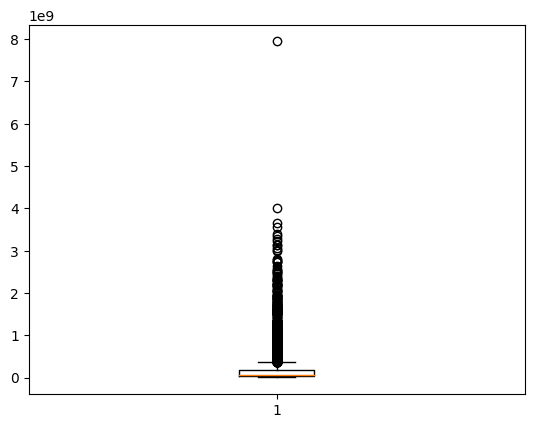

In [ ]:
q1 = cost['R1401']['value'].quantile(.25)
q3 = cost['R1401']['value'].quantile(.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

print((len(cost['R1401'][cost['R1401']['value'] > upper_bound]) / len(cost['R1401']))*100)

plt.boxplot(cost['R1401']['value'])
plt.show()

In [ ]:
cost['R1401']

,Address,value
0,20001383919,520292940
1,20001383923,112480000
2,20001383925,79647552
3,20001383929,38494776
4,20001383932,98822000
...,...,...
18365,23006709820,98890000
18366,23006709823,62119000
18367,23006709826,438877000
18368,23006709827,102924000


In [ ]:
print(r1401['R1401P3S01'].code.value_counts())
print('----------------------------------')
print(r1401['R1401P3S02'].code.value_counts())
print('----------------------------------')
print(r1401['R1401P3S03'].code.value_counts())

#P3S02 --> drug

code
11731    17016
11724    16578
11732    16392
11441    14822
11231    14521
         ...  
11933        7
11238        6
11239        4
11318        2
11319        1
Name: count, Length: 194, dtype: int64
----------------------------------
code
22111    1658
22113    1193
Name: count, dtype: int64
----------------------------------
code
31317    4743
31251    1591
31212    1232
31216    1192
31222    1134
         ... 
31237       9
31258       8
31213       5
31257       3
31214       2
Name: count, Length: 81, dtype: int64


***  محاسبه مجموع هزینه های غیر خوراکی ***

In [ ]:
food_cost = {k : pd.DataFrame() for k in file_names}
food_cost['R1401'] = pd.DataFrame(cost_sheet_divided['R1401']['R1401P3S01'].groupby('Address').agg({'value' : 'sum'})).reset_index()
food_cost['R1401'].columns = ['Address', 'value']
food_cost['R1401']

,Address,value
0,20001383919,13051000
1,20001383923,39670000
2,20001383925,19360000
3,20001383929,22626000
4,20001383932,47132000
...,...,...
18276,23006709820,40390000
18277,23006709823,20529000
18278,23006709826,16407000
18279,23006709827,13404000


In [ ]:
print(f"intersection = {len(set(list(food_cost['R1401'].Address)) & set(list(cost['R1401'].Address)))}")
print(f"len cost.Address = {len(cost['R1401'].Address)}")
print(f"len food_cost.Address = {len(food_cost['R1401'].Address)}")

intersection = 18281
len cost.Address = 18370
len food_cost.Address = 18281


In [ ]:
total_cost = {k : pd.DataFrame() for k in file_names}
total_cost['R1401'] = pd.merge(cost['R1401'], food_cost['R1401'], how = 'outer', on = 'Address', )
total_cost['R1401'].columns = ['Address', 'total_cost', 'edible_cost']
total_cost['R1401'].loc[(total_cost['R1401']['total_cost'].isna()) | (total_cost['R1401']['edible_cost'].isna())]

,Address,total_cost,edible_cost
876,20102398535,7000000,NaN
877,20102398620,9000000,NaN
878,20102398622,31714000,NaN
903,20103399125,11000000,NaN
916,20104399330,5150000,NaN
...,...,...,...
17618,22907696023,3114388,NaN
17658,22908696723,8382388,NaN
17959,23002701926,20000000,NaN
17988,23002702435,15000000,NaN


Filling None value with median

In [ ]:
total_cost_median = total_cost['R1401'][~total_cost['R1401'].isna()].median()
total_cost['R1401'].fillna(total_cost_median, inplace = True)

In [ ]:
total_cost['R1401']['inedible_cost'] = total_cost['R1401']['total_cost'] - total_cost['R1401']['edible_cost']
total_cost['R1401']

,Address,total_cost,edible_cost,inedible_cost
0,20001383919,520292940,13051000.0,507241940.0
1,20001383923,112480000,39670000.0,72810000.0
2,20001383925,79647552,19360000.0,60287552.0
3,20001383929,38494776,22626000.0,15868776.0
4,20001383932,98822000,47132000.0,51690000.0
...,...,...,...,...
18365,23006709820,98890000,40390000.0,58500000.0
18366,23006709823,62119000,20529000.0,41590000.0
18367,23006709826,438877000,16407000.0,422470000.0
18368,23006709827,102924000,13404000.0,89520000.0


In [ ]:
print(f"percentage of family with negative inedible_cost = {len(total_cost['R1401'].loc[total_cost['R1401']['inedible_cost'] < 0]) / len(total_cost['R1401']) * 100}")

percentage of family with negative inedible_cost = 0.391943385955362


In [ ]:
save_excel(total_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Total Cost For Each Family R1401', 'xlsx')

OSError: Cannot save file into a non-existent directory: 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data'

***  محاسبه مجموع هزینه های حمل و نقل ***

In [ ]:
transportaion_codes = [71, 72, 72]
transportaion_cost = {k : pd.DataFrame() for k in file_names}

for code in transportaion_codes:
    new_cost = pd.DataFrame(r1401['R1401P3S13'][r1401['R1401P3S13']['code'].astype('str').str.startswith(f'{code}')])
    transportaion_cost['R1401'] = pd.concat([transportaion_cost['R1401'], new_cost])

transportaion_cost['R1401']

,Address,code,value
750,10001001920,71314,500000
913,10005004613,71116,45000000
939,10009008508,71311,2000000
1090,10012010120,71116,850000000
1580,10010008920,71311,11000000
...,...,...,...
246267,13001375923,72119,2500000
246268,13001375923,72122,18000000
246285,13001369614,72117,4500000
246286,13001369614,72119,1000000


In [ ]:
transportaion_cost['R1401'] = pd.DataFrame(transportaion_cost['R1401'].groupby('Address').agg({'value' : 'sum'})).reset_index()
transportaion_cost['R1401'].columns = ['Address', 'value']
transportaion_cost['R1401']

,Address,value
0,10001000111,21400000
1,10001000117,21360000
2,10001000123,20800000
3,10001000211,4800000
4,10001000214,21100000
...,...,...
10720,13006383611,8100000
10721,13006383620,9600000
10722,13006383623,15700000
10723,13006383820,17900000


In [ ]:
save_excel(transportaion_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Transportation Cost R1401', 'xlsx')